# Fourier analysis
## Fourier series

Perhaps the best approach to understanding Fourier series and transforms is to start with the original rationale. Joseph Fourier developed his revolutionary approach to solve real heat flow problems.
These involved solving the heat equation, to find how the temperature $u$ in some material evolves over time. Here is the heat equation in one spatial dimension $x$ (to keep things simple). It could describe how temperature varies along a rod:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}\tag{1}
$$

This is a diffusion equation, and the constant $D$ is the diffusion coefficient, a property of the medium. It doesn't matter too much what all of this means for now.

You can use separation of variables to solve this partial differential equation (PDE). This means assuming that the temperature $u$ is composed of the product of two independent terms: one being purely time dependent, and one being purely space dependent:

$$u=X(x)\cdot T(t)$$

If this seems like a wild guess, it's because it is. We are assuming that the temperature distribution maintains a constant shape in space, and that over time the shape is uniformly damped.  

If we plug this form of $u$ into the heat equation we find that we can neatly separate the time and space dependent parts on either side of the equation. This is because the time dependent parts are constants under differentiation over space, and vice-versa. So we get:

$$
D\frac{X''(x)}{X(x)}=\frac{T'(t)}{T(t)}
$$

Here the prime indicates differentiation (and double prime is differentiating twice). The trick to continuing here is to think that since the left hand side cannot vary with time, the right hand side must not either! This means $T'/T$ is constant, and so is $X''/X$ and they are equal. We will name this constant  $\lambda$:

$$
D\frac{X''(x)}{X(x)}=\frac{T'(t)}{T(t)}=\lambda
$$
And now we have two equations:

$$
X''(x)=\frac{\lambda}{D} X(x)
$$

$$
T'(t)=\lambda T(t)
$$

These are now ordinary differential equations (ODEs) and can be solved more easily.

Let's look at the time dependence $T$. We're looking for a function $T(t)$ that, when differentiated once, returns itself times a constant. The exponential $e^{\lambda t}$ fits the bill, and this is so by definition! $e^x$ is the function that satisfies $f(x)=f'(x)$.
So we've found half of the solution $u=e^{\lambda t}\cdot X(x)$. Not bad. However, there's a problem. $\lambda$ can't be positive otherwise temperature will increase exponentially over time, which would violate energy conservation: we're adding free energy over time into the system, when we expect it to be dissipated. $\lambda>0$ is still mathematically valid, but not physical! We can go back and define the constant with a negative sign so that we can assume all physical quantities are positive. This fixes our time dependence, but also has some interesting consequences to the space dependent equation.

$$
T'(t)=-\lambda T(t) \tag{2}
$$

So now $T(t)=e^{-\lambda t}$ and we're happy. Well, almost. We can see that temperature will decay exponentially over time to zero, the equilibrium temperature, but there could also be some unknown constant in the mix: $T(t)=C e^{\lambda t}$.

The big problem that Fourier faced comes about when looking at the spatial distribution of $X(x)$. For simplicity let's introduce another constant $k^2=\lambda/D$. And here's our ODE for the spatial dependence:

$$
X''(x)=- k^2 X(x) \tag{3}
$$

So the temperature distribution along this rod needs to be a function whose second derivative is equal to itself (times a constant). This is a property that the sine and cosine functions have, so they should work as valid values of $X(x)$. It may seem strange to jump to a solution like this, but as you may have seen by now, wild guessing is the name of the game.
So we plug in a $X(x) = \sin(k x)$ and we get:

$$\frac{d^2 \sin(k x)}{dx^2} = -k^2 \sin (k x)$$ 

Which works. Also $\cos(k x)$:

$$\frac{d^2 \cos(k x)}{dx^2} = -k^2 \cos (k x)$$

Not only this, the argument of cosine and sine could also have an additional constant, like $\cos(k x + \phi)$, since on differentiation, $\phi$ doesn't come out of the argument of the cosine (using the chain rule): 

$$\frac{d^2\cos(k x + \phi)}{dx^2}=-k^2\cos(k x + \phi)$$

Somewhat surprisingly, the exponential $e^{k x}$ doesn't work!

$$\frac{d^2 e^{k x}}{dx^2} = {\color{Red}+}k^2 e^{k x}$$

The sign ends up wrong on the RHS. So surely flipping the sign of the exponent would? No. Plugging in $e^{-k x}$ still results in a plus sign on the RHS after double differentiation since $(-k)^2=+k^2$.

But inserting the imaginary unit $i$ into the exponent $e^{ik x}$ (or $e^{-ik x}$) does work, as the sign will flip correctly after differentiating twice (because $i^2=-1$ of course)! 

$$\frac{d^2 e^{ik x}}{dx^2} = -k^2 e^{ik x}$$

We know (thanks to Euler's hard work) that $e^{ix}$ is a combination of a cosine (real part) and a sine (the imaginary part), so we can see why that worked. ([See the notebook on complex numbers which is best to have looked at first](Complex.ipynb))

Now we have some solutions, but any linear combinations of valid solutions for $X(x)$ also work, like 

$$X(x)=A\sin(k x) + B\cos(k x)$$

Here we have some unknown constants $A$ and $B$.
You can try plugging this into Equation (3) and you will see it all checks out.

We have to remember that we haven't pinned down a value of $k$, since $\lambda$ isn't known. There could be multiple valid values of $k$, and this will depend on any additional constraints we put on the system. If $k$ could only have certain discrete values, then a valid solution could end up being an infinite series, like:

$$
X(x)=\sum_{n=1}^{\infty}\left(A_n \sin(k_n x) + B_n \cos (k_n x)\right)
$$

This is quite interesting. The temperature distribution could be an infinite sum of sines and cosines. Fourier thought - without much rigorous justification - that *any* function could be represented as a sum of such harmonics. Daniel Bernoulli had previously come to a similar conclusion while tackling problems on vibrating strings. 

Indeed a lot of shapes are possible with just a few harmonics. Play with the code below which sums sine shapes only, and only with arguments that are integer multiples:
$$
f(x) = \sum_{n=1}^\infty A_n \sin\left(\frac{n \pi}{L} x\right)
$$
with $n\in\{1,2,3,...\}$. This is a special case that is very important as we'll see. This function describes just as well the temperature along a rod of length $L$ as the motion of a vibrating string of length $L$. Try to see what constraints there are to the overall shape.

In [68]:
import numpy as np
import matplotlib.pyplot as plt 
from ipywidgets import interact, FloatSlider

x = np.linspace(0, 1)

def change_coefficients(a1, a2, a3, a4, a5):

    fig, (ax1, ax2)=plt.subplots(nrows=2, sharex='col')
    
    t1 = a1*np.sin(np.pi*x)
    t2 = a2*np.sin(2*np.pi*x)
    t3 = a3*np.sin(3*np.pi*x)
    t4 = a4*np.sin(4*np.pi*x)
    t5 = a5*np.sin(5*np.pi*x)
   
    tot = t1+t2+t3+t4+t5

    ax1.plot(x, t1)
    ax1.plot(x, t2)
    ax1.plot(x, t3)
    ax1.plot(x, t4)
    ax1.plot(x, t5)
    ax2.plot(x, tot/5, 'k')
    ax2.grid()
    ax1.grid()
    ax2.set_ylim((-1,1))
    ax1.set_ylim((-1,1))
    ax1.set_title('Individual harmonics')
    ax2.set_title('Sum')
    
    
interact(change_coefficients, a1=FloatSlider(min=-1, max=1, step=0.05, value=0.8, description='A1'),
        a2=FloatSlider(min=-1, max=1, step=0.05, value=0.2, description='A2'),
        a3=FloatSlider(min=-1, max=1, step=0.05, value=0.3, description='A3'),
        a4=FloatSlider(min=-1, max=1, step=0.05, value=0.4, description='A4'),
         a5=FloatSlider(min=-1, max=1, step=0.05, value=0.2, description='A5')
        );


interactive(children=(FloatSlider(value=0.8, description='A1', max=1.0, min=-1.0, step=0.05), FloatSlider(valu…

## The finite rod and the Fourier sine series

So we have potentially infinite solutions at the moment, though we know that a physical problem ought to have just one answer. To find a particular solution to a particular problem we need to specify initial and boundary conditions so we can narrow things down.

We might say that our rod is finite, of length $L$ and that $u=0$ at $x=0$ and $x=L$. This way we're fixing the temperature at both ends of the rod (by fixing zeroes at the boundaries we are technically applying *Dirichlet boundary conditions*). Let's do this by choosing one of the valid solutions above: $X(x)=A\sin{k x}$.

$$X(0)=A\sin{(k \cdot 0)}=0$$

This is automatically satisfied by the $\sin$ function, no matter what $k$ is. So $X=A \sin(k x)$ is a solution! We were a little lucky here that we picked the right form immediately. But we have no idea what $k$ or $A$ are. So off we go to the other end of the rod:

$$X(L)=A\sin{(k \cdot L)}=0$$

Now we're in trouble, because there are multiple (discrete) values of $k$ that fulfill this condition, but at least we know what they are:

$$
k = \frac{n \pi}{L}
$$

where $n \in \{ 1, 2, 3, ... \}$

Now we also have a value for $\lambda$:

$$\lambda = D \left(\frac{n\pi}{L}\right)^2$$

The solution so far is an infinite sum of sines. We still don't know what $A$ is and we can't assume it's the same for every $n$!

$$
u=X(x)\cdot T(t) = \sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi}{L} x\right) \cdot e^{-D \left(\frac{n\pi}{L}\right)^2 t}
$$

We could have started with the general solution, without guesswork:

$$X(x)=A\sin(k x) + B\cos(k x)$$

When fixing the first boundary to zero we get:

$$u(0)=0=A\sin(k \cdot 0) + B\cos(k \cdot 0)=B$$

So $B=0$ and our solution is still $X(x)=A \sin(k x)$.

It's clear $X(x)=B\cos{k x}$ on its own doesn't work (you can try) unless $B=0$ and temperature is zero everywhere and always. But it could nonetheless be a solution to a slightly different problem! Sine and cosine are after all only 90 degrees apart.

Now, we know the final form of $X(x)$:

$$
X(x)=\sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi}{L} x\right)
$$

And this we call a Fourier sine series. This is really saying that if $X(x)$ is to satisfy our boundary conditions it must be an infinite sum of harmonics (only sines in this case)! Since the sine function is odd, the function $X(x)$ must be odd (any sum of odd functions is itself odd). $X(x)$ is also periodic, with period $T=2L$, since all the elements in the sum are periodic with period $T=2L$. Higher harmonics, with $n>1$ are periodic over shorter periods, but their arguments are integer multiples of the sine for $n=1$ and thus are still periodic over $2L$.

## Orthogonality$ 

So how do we move on from here and get the coefficients $A_n$? We have to specify what the temperature looks like initially, at time $t=0$. Let's start by saying at time zero the temperature distribution follows a function $f(x)$. We know this $f(x)$ depends on $x$ only, so we can assume this can only apply to our spatial dependence $X(x)$. Interestingly, this implies that the distribution does not change at all, even if we're trying to fix initial conditions only. We don't even have to look at $t$. We've really already said that when we applied our separation of variables earlier. So now:

$$X(x)=f(x)=\sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi}{L} x\right)$$

The tricky part here is still finding the coefficients. Here is where we use a very important property: orthogonality. 

Let's start with $f(x)=\sin(\pi x)$. The integral of this function for $x$ between 0 and 1 describes the area of a quarter circle of radius 1, which is $\frac{\pi}{4}$ 

$$\int_0^1 \sin(\pi x) dx = \frac{\pi}{4}$$

Just a little extension here to introduce the constant $L$:

$$\int_0^L \sin\left(\frac{\pi}{L} x\right) dx = \frac{\pi}{4}$$

If we instead integrate $f^2(x)$ over the same interval $[0,1]$ we get:

$$\int_0^L \sin^2\left(\frac{\pi}{L} x\right)dx =  0$$

If we multiply $f(x)$ by $g(x)=\sin\left(2\frac{\pi}{L} x\right)$ and integrate over the same interval $[0,1]$ we get:

$$\int_0^L \sin\left(\frac{\pi}{L} x\right)\sin\left(2\frac{\pi}{L} x\right) dx =  0$$





## Fourier transform

We have a function of time, $y(t)$. We are told there is a special $\mathcal{F}$ operation - called the Fourier transform - that takes a function of time $y(t)$ and transforms it into a function of frequency $Y(k)$.

$\mathcal{F}(y)=Y(\omega)=\int_{-\infty}^{\infty}y(t)e^{-i\omega t}dt$

On the face of it, this integral does not seem very well behaved. It could diverge very easily, unless the function $y(t)$ is limited in time (for example if it's decaying to zero, like $y=e^{-at}$). 

If the purpose of $\mathcal{F}$ is to extract frequency information, then the best way to test that is to plug in a single frequency signal and see if it does what is claimed. 

Let's take the function $y$ representing a wave of unit amplitude at frequency $\omega_0$:

$y(t)=e^{i\omega_0 t}$ 

We already know this oscillates at one frequency, $\omega_0$ so our Fourier transform should tell us this.

Plugging this $y$ into the integral gives us:

$\mathcal{F}(y)=\int_{-\infty}^{\infty} e^{i\omega_0 t} e^{-i\omega t}dt=\int_{-\infty}^{\infty} e^{i (\omega_0-\omega) t} dt$

Well this is awkward. This monster would diverge whatever the frequency $\omega_0$ is. 

But there are two distinct cases: 
* if the frequency matches: $\omega_0=\omega$, then $e^{i\omega t}e^{i\omega_0 t}=e^{i 0}=1$ and the integrand is a constant (it doesn't depend on time $t$ anymore). But the integral diverges because the area under the curve of a flat line is infinite!
* If the frequency is different $\omega_0\neq \omega$, then $e^{i\omega t}e^{i\omega_0 t}=e^{i (\omega_0-\omega) t}$, then the integrand keeps oscillating at a new frequency, $\omega_0-\omega$ and does not converge either.

Something is happening geometrically. Our ideal signal $y$, represented as a vector in the complex plane, is rotating counter-clockwise at a frequency of $\omega_0$ radians per second. The term $e^{-i\omega t}$ is also constantly rotating, but in the opposite direction at a frequency of $\omega$. By multiplying $y$ with this term we are rotating $y$ (by the angle $\omega t$), and if $\omega_0=\omega$ the product is a constant, $e^{i0}=1$, because the two rotations cancel each other. This is the same as multiplication of a complex number by its conjugate, resulting in a purely real constant (the square of its magnitude).

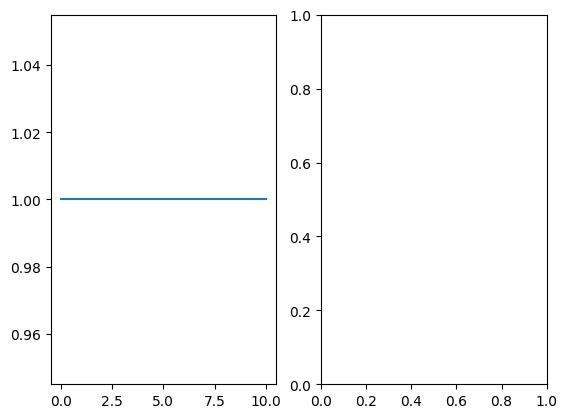

interactive(children=(FloatSlider(value=1.0, description='Frequency', max=2.0, step=0.025), Output()), _dom_cl…

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

A = 1
f = 1
t = np.linspace(0, 10,500)
    
def shift(f):
    
    y = A * np.exp(1j*2*np.pi*t)
    fterm = np.exp(-1j*2*np.pi*f*t)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.plot(t, y*fterm)
    ax2.quiver(0,0,np.real(y[0]),np.imag(y[0]), 'b')
    ax2.quiver(0,0,np.real(fterm[0]),np.imag(fterm[0]), 'r')
    

interact(shift, f=FloatSlider(min=0, max=2, step=0.025, value=1, description='Frequency'));
